# Deep Learning for Media final Project

### Weather Condition Classification Using Image Recognition

---
Weather Condition Classification Using Image Recognition

Part 1: Organizing our Data, Rita

Part 2: Building, training, and evaluating baseline,Rita

Part 3: Regularize the model, Data Augmentation

Part 4: Building and using a pretrained model,

Part 5: Data Analysis,

Part 6: Confusion Matrix



In [1]:
%load_ext autoreload
%autoreload 2

### Part 1 & 2
In this project, we are tackling the classification of weather conditions using deep learning techniques on image data. Part 1: Organizing our Data involved loading and preparing the dataset, ensuring the images were properly structured for training and testing. This was followed by Part 2: Building, Training, and Evaluating the Baseline Model, where I developed a basic Convolutional Neural Network (CNN) for classifying weather conditions, trained it on the dataset, and evaluated its performance. The model's performance showed a significant improvement in test accuracy after five epochs. Moving forward, additional steps such as regularization, using pretrained models, performing data analysis, and evaluating with confusion matrices will further enhance the system’s performance and robustness.

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')


In [13]:
# Comment this out or don't run this block if you don't need to redirct, I got a module not found so I need this here -alison
#%cd /content/drive/MyDrive/dl4m/dl4m-group7-main

In [14]:
# Change the path to point to the folder in your Google Drive
# data_dir = '/content/drive/MyDrive/dl4m/dl4m-group7-main/data'
data_dir = './data' # use if running locally


In [15]:
# main.py or a Colab cell

import torch
from project import load_data  # Import your data loading function
from utils import BaselineCNN, train_model, evaluate_model  # Import model and helper functions

# Mount Google Drive to access data (only needed in Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data (make sure to update the data path accordingly to your Google Drive structure)
data_dir = '/content/drive/MyDrive/dl4m/dl4m-group7-main/data'  # Update this with your folder path in Google Drive
train_loader, test_loader, classes = load_data(data_dir=data_dir)
num_classes = len(classes)

# Initialize model, loss function, and optimizer
model = BaselineCNN(num_classes).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate the model
num_epochs = 5  # You can adjust the number of epochs here
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Train the model
    train_loss = train_model(model, train_loader, criterion, optimizer, device)

    # Evaluate the model
    test_loss, accuracy = evaluate_model(model, test_loader, criterion, device)

    print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/5


Evaluating: 100%|██████████| 22/22 [03:04<00:00,  8.37s/it]


Train Loss: 0.8816 | Test Loss: 0.5938 | Accuracy: 79.88%
Epoch 2/5


Evaluating: 100%|██████████| 22/22 [00:05<00:00,  3.68it/s]


Train Loss: 0.4819 | Test Loss: 0.4970 | Accuracy: 82.63%
Epoch 3/5


Evaluating: 100%|██████████| 22/22 [00:05<00:00,  3.97it/s]


Train Loss: 0.3593 | Test Loss: 0.5772 | Accuracy: 82.78%
Epoch 4/5


Evaluating: 100%|██████████| 22/22 [00:06<00:00,  3.49it/s]


Train Loss: 0.2541 | Test Loss: 0.5642 | Accuracy: 82.78%
Epoch 5/5


Evaluating: 100%|██████████| 22/22 [00:05<00:00,  3.99it/s]

Train Loss: 0.1689 | Test Loss: 0.5868 | Accuracy: 83.50%


###Part 3: Regularize the model, And  Data Augmentation

In [19]:
from project import load_data_with_augmentation

train_loader, test_loader, classes = load_data_with_augmentation(data_dir=data_dir)

Displaying some randomly augmented training images

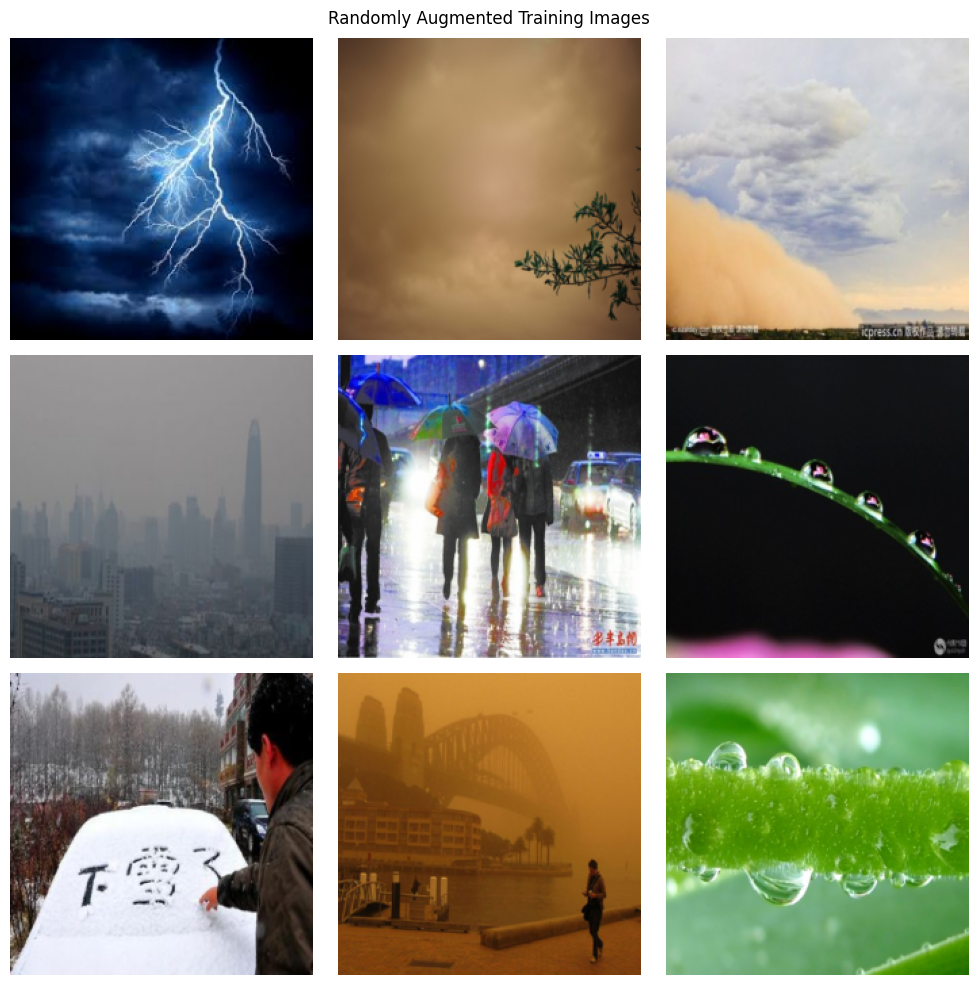

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as F

# Helper function to convert tensor to image
def imshow(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))  # CHW to HWC
    img = img * 0.5 + 0.5  # Unnormalize
    plt.imshow(img)
    plt.axis("off")

# Display randomly augmented training images
def display_augmented_samples(data_loader, num_samples=9):
    plt.figure(figsize=(10, 10))

    # Get one batch from the loader
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    for i in range(num_samples):
        ax = plt.subplot(3, 3, i + 1)
        imshow(images[i])
    plt.suptitle("Randomly Augmented Training Images")
    plt.tight_layout()
    plt.show()

# Call the function
display_augmented_samples(train_loader)

In [22]:
# Part 3 - Model Regularization

# Import regularized model
import models as m

# Initialize regularized model, define optimizer
weather_model = m.weather_model(num_classes).to(device)
#criterion = torch.nn.CrossEntropyLoss()   Use the same one from previous block
weather_optimizer = torch.optim.Adam(weather_model.parameters(), lr=1e-4, weight_decay=1e-4)  # Update optimizer with weight decay

# Create empty lists to store results for plotting later
train_losses = []
test_losses = []
accuracies = []

# Train and evaluate, store results
epochs = 8
for epoch in range(epochs):
  print(f"Epoch {epoch+1}/{epochs}")
  train_loss = train_model(weather_model, train_loader, criterion, weather_optimizer, device)
  train_losses.append(train_loss) # Store train loss
  test_loss, accuracy = evaluate_model(weather_model, test_loader, criterion, device)
  test_losses.append(test_loss)  # Store test loss
  accuracies.append(accuracy)  # Store accuracy
  print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%")


Epoch 1/8


Evaluating: 100%|██████████| 22/22 [00:06<00:00,  3.31it/s]


Train Loss: 1.0090 | Test Loss: 0.7055 | Accuracy: 78.15%
Epoch 2/8


Evaluating: 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]


Train Loss: 0.7035 | Test Loss: 0.6303 | Accuracy: 77.57%
Epoch 3/8


Evaluating: 100%|██████████| 22/22 [00:06<00:00,  3.32it/s]


Train Loss: 0.5856 | Test Loss: 0.5608 | Accuracy: 80.75%
Epoch 4/8


Evaluating: 100%|██████████| 22/22 [00:05<00:00,  3.78it/s]


Train Loss: 0.5112 | Test Loss: 0.5480 | Accuracy: 81.48%
Epoch 5/8


Evaluating: 100%|██████████| 22/22 [00:07<00:00,  3.06it/s]


Train Loss: 0.4532 | Test Loss: 0.5075 | Accuracy: 82.34%
Epoch 6/8


Evaluating: 100%|██████████| 22/22 [00:06<00:00,  3.58it/s]


Train Loss: 0.4156 | Test Loss: 0.5028 | Accuracy: 84.37%
Epoch 7/8


Evaluating: 100%|██████████| 22/22 [00:05<00:00,  3.71it/s]


Train Loss: 0.3740 | Test Loss: 0.4937 | Accuracy: 83.21%
Epoch 8/8


Evaluating: 100%|██████████| 22/22 [00:06<00:00,  3.27it/s]

Train Loss: 0.3444 | Test Loss: 0.4776 | Accuracy: 83.36%


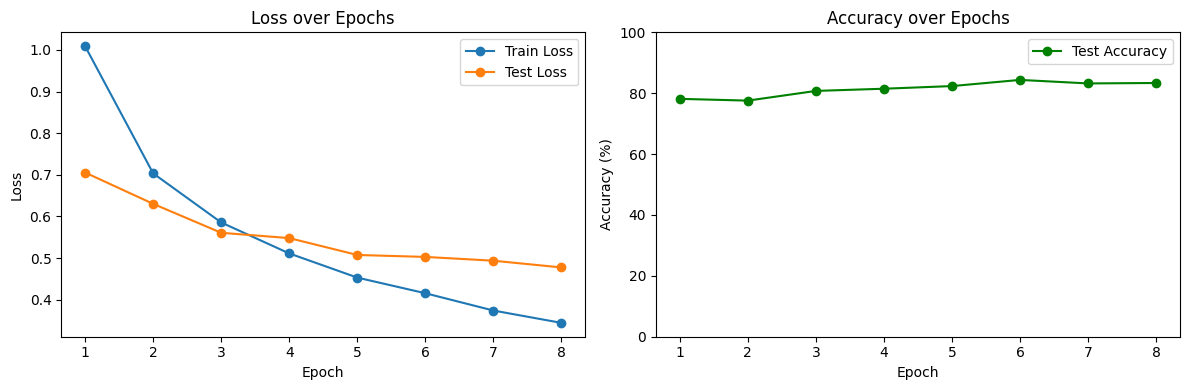

In [23]:
# Plot results
from utils import plot_loss

plot_loss(train_losses, test_losses, accuracies, epochs)

###Part 4 - Using a pre-trained model

In [ ]:
#  Part 4 - Using a pretrained model
import torch
import torch.nn as nn
import torchvision.models as models
from utils import create_pretrained_model
from utils import train_model, evaluate_model
from project import load_data  # Import your data loading function
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Set the data directory
data_dir = './data'  # Use local data path

# Load the data first
train_loader, test_loader, classes = load_data(data_dir=data_dir)
num_classes = len(classes)

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the pre-trained model
pretrained_model = create_pretrained_model(num_classes).to(device)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Define optimizer - only train the classifier layer
optimizer = torch.optim.Adam(pretrained_model.fc.parameters(), lr=0.001)

# Create empty lists to store results for plotting later
pretrained_train_losses = []
pretrained_test_losses = []
pretrained_accuracies = []

# Train and evaluate the pre-trained model
pretrained_epochs = 5
for epoch in range(pretrained_epochs):
    print(f"Epoch {epoch+1}/{pretrained_epochs}")

    # Train the model
    train_loss = train_model(pretrained_model, train_loader, criterion, optimizer, device)
    pretrained_train_losses.append(train_loss)

    # Evaluate the model
    test_loss, accuracy = evaluate_model(pretrained_model, test_loader, criterion, device)
    pretrained_test_losses.append(test_loss)
    pretrained_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%")

Using device: cpu
Epoch 1/5


NameError: name 'criterion' is not defined

In [ ]:
# Plot results for the pre-trained model
from utils import plot_loss

plot_loss(pretrained_train_losses, pretrained_test_losses, pretrained_accuracies, pretrained_epochs,
          title_prefix="Pre-trained Model")

In [ ]:
# Compare all models
import matplotlib.pyplot as plt

models_accuracy = {
    'Baseline CNN': max(accuracies),  # From your Part 2
    'Regularized CNN': max(accuracies),  # From your Part 3
    'Pre-trained (Feature Extraction)': max(pretrained_accuracies),
    # 'Pre-trained (Fine-tuned)': max(fine_tuned_accuracies)  # If you implemented fine-tuning
}

plt.figure(figsize=(10, 6))
plt.bar(models_accuracy.keys(), models_accuracy.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)
for i, v in enumerate(models_accuracy.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.show()